In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

In [2]:
police=gpd.read_file('..\data\policprecincts.geojson')
print(police)
police.head()

        precinct     shape_area      shape_len  \
0        CENTRAL  98541971.0257  46234.6717307   
1           EAST  562260180.986  90261.1338967   
2      HERMITAGE  2496337143.44  521944.947628   
3        MADISON  1913402934.01   254564.86409   
4  MIDTOWN-HILLS  1317030605.73  187104.273068   
5          NORTH  3287881220.97  334895.629437   
6          SOUTH  1936875931.39  422441.749973   
7           WEST  3037053503.78  319947.055426   

                                            geometry  
0  MULTIPOLYGON (((-86.77525 36.14894, -86.77649 ...  
1  MULTIPOLYGON (((-86.74977 36.24057, -86.74955 ...  
2  MULTIPOLYGON (((-86.61306 36.24427, -86.61038 ...  
3  MULTIPOLYGON (((-86.74955 36.24047, -86.74977 ...  
4  MULTIPOLYGON (((-86.77935 36.14855, -86.77912 ...  
5  MULTIPOLYGON (((-86.90742 36.39053, -86.90725 ...  
6  MULTIPOLYGON (((-86.63676 36.07248, -86.63664 ...  
7  MULTIPOLYGON (((-86.90759 36.13557, -86.90545 ...  


,precinct,shape_area,shape_len,geometry
0,CENTRAL,98541971.0257,46234.6717307,"MULTIPOLYGON (((-86.77525 36.14894, -86.77649 ..."
1,EAST,562260180.986,90261.1338967,"MULTIPOLYGON (((-86.74977 36.24057, -86.74955 ..."
2,HERMITAGE,2496337143.44,521944.947628,"MULTIPOLYGON (((-86.61306 36.24427, -86.61038 ..."
3,MADISON,1913402934.01,254564.86409,"MULTIPOLYGON (((-86.74955 36.24047, -86.74977 ..."
4,MIDTOWN-HILLS,1317030605.73,187104.273068,"MULTIPOLYGON (((-86.77935 36.14855, -86.77912 ..."


In [3]:
type(police)

geopandas.geodataframe.GeoDataFrame

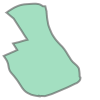

In [4]:
police.loc[0, 'geometry']

<Axes: >

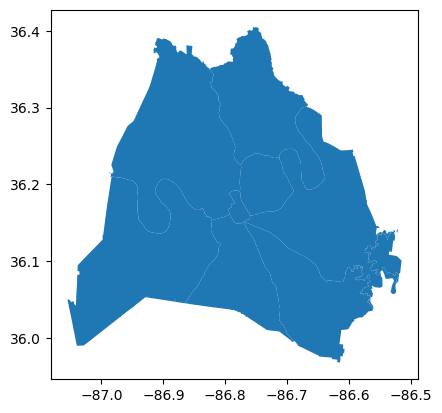

In [5]:
police.plot()

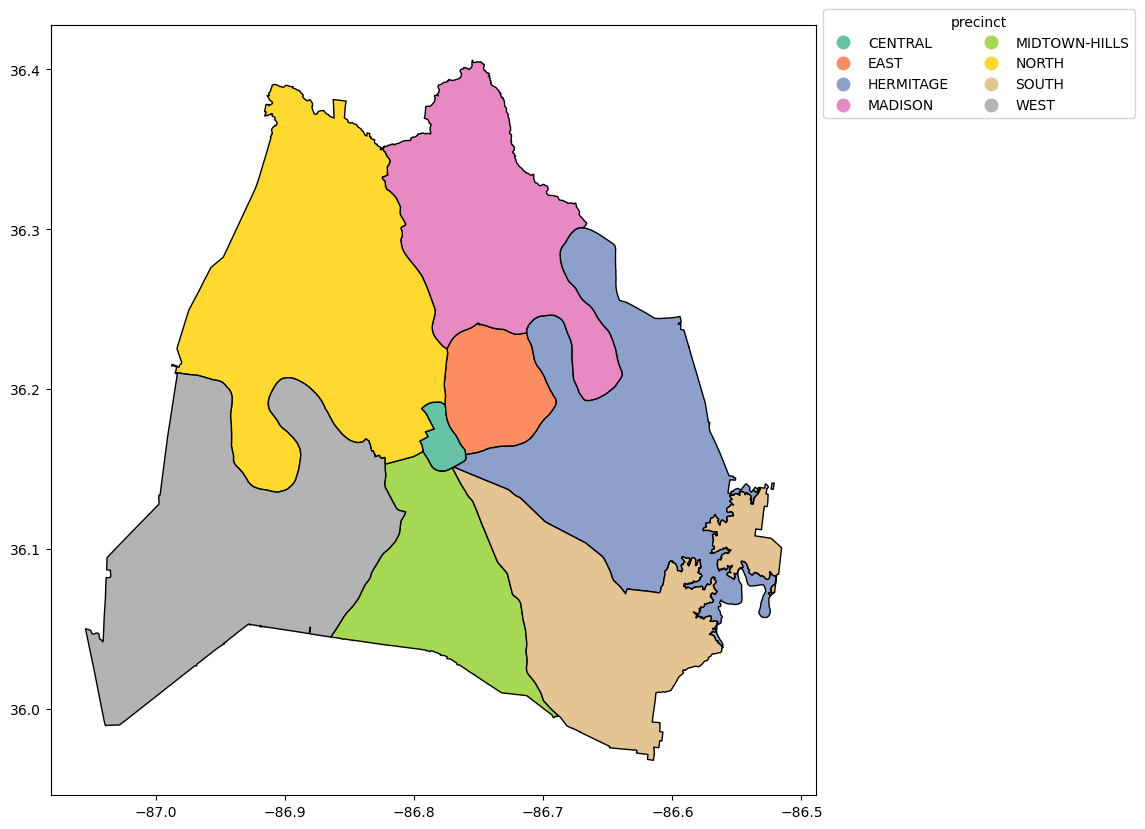

In [6]:
leg_kwds = {'title': 'precinct', 'loc': 'upper left', 
            'bbox_to_anchor': (1, 1.03), 'ncol': 2}

police.plot(column = 'precinct', figsize=(10, 10),
              edgecolor = 'black',
              legend = True, legend_kwds = leg_kwds, 
              cmap = 'Set2')
plt.show()

In [7]:
water = pd.read_csv('../data/waterfountains_hydrationsystems.csv')


In [10]:
print(water.shape)
water.head(3)

(73, 10)


,the_geom,OBJECTID,LAT,NAME,LON,Location,Dog,FeatType,Cnt,ADA
0,POINT (-86.89425345576078 36.26250455840148),45921,-86.894253,Beaman Water Fountain,36.262505,NaN,Y,Fountain/Bottle filler/ADA,1,Y
1,POINT (-86.90622747033689 36.06089914863129),45937,-86.906227,Edwin Nature Center Water Fountain,36.060899,Restrooms Breezeway,N,Bottle Filler/ADA,1,Y
2,POINT (-86.86727565917963 36.08310102493863),45964,-86.867276,Percy Warner Belle Meade Gates Water Fountain,36.083101,Belle Meade Gates,Y,ADA Bowl,1,Y


In [11]:
water.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   the_geom  73 non-null     object 
 1   OBJECTID  73 non-null     int64  
 2   LAT       73 non-null     float64
 3   NAME      73 non-null     object 
 4   LON       73 non-null     float64
 5   Location  65 non-null     object 
 6   Dog       73 non-null     object 
 7   FeatType  73 non-null     object 
 8   Cnt       73 non-null     int64  
 9   ADA       73 non-null     object 
dtypes: float64(2), int64(2), object(6)
memory usage: 5.8+ KB


In [12]:
police.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [16]:
water_geo = gpd.GeoDataFrame(water, crs = police.crs, geometry = gpd.points_from_xy(water.LON, water.LAT))

In [17]:
type(water_geo)

geopandas.geodataframe.GeoDataFrame

In [20]:
police = police[['precinct', 'geometry']]

In [21]:
water_by_precinct = gpd.sjoin(water_geo, police, predicate = 'within')

In [22]:
water_by_precinct.head()

,the_geom,OBJECTID,LAT,NAME,LON,Location,Dog,FeatType,Cnt,ADA,geometry,index_right,precinct


In [ ]:
water_by_precinct[